In [1]:
import pandas as pd
import numpy as np
import quandl as ql
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
ql.ApiConfig.api_key = "mReXiguoQheAobrp8Dmn"
data = ql.get("EIA/PET_RWTC_D")

In [3]:
data.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


<Axes: xlabel='Date'>

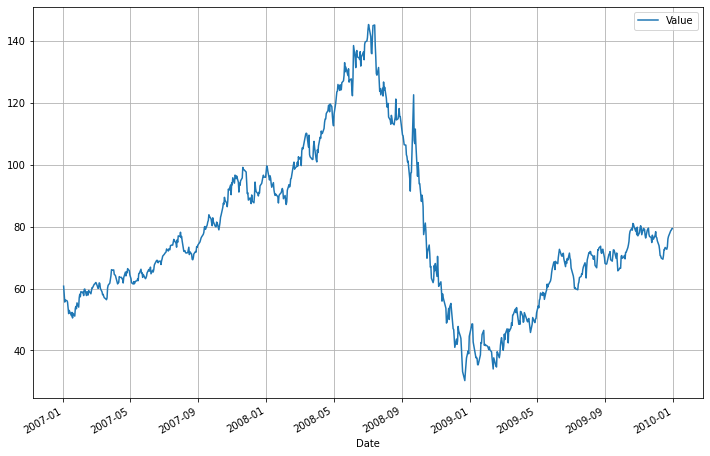

In [4]:
data['2007':'2009'].plot(grid=True, figsize=(12, 8))

In [5]:
import requests
url = 'https://www.quandl.com/api/v3/datasets/WIKI/FB/data.csv?api_key=mReXiguoQheAobrp8Dmn'
res = requests.get(url)

In [6]:
import io
byte_content = res.content
string_content = byte_content.decode('utf-8')
df = pd.read_csv(io.StringIO(string_content), index_col='Date' ).sort_index()

In [7]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2012-05-18,42.05,45.00,38.00,38.2318,573576400.0,0.0,1.0,42.05,45.00,38.00,38.2318,573576400.0
2012-05-21,36.53,36.66,33.00,34.0300,168192700.0,0.0,1.0,36.53,36.66,33.00,34.0300,168192700.0
2012-05-22,32.61,33.59,30.94,31.0000,101786600.0,0.0,1.0,32.61,33.59,30.94,31.0000,101786600.0
2012-05-23,31.37,32.50,31.36,32.0000,73600000.0,0.0,1.0,31.37,32.50,31.36,32.0000,73600000.0
2012-05-24,32.95,33.21,31.77,33.0300,50237200.0,0.0,1.0,32.95,33.21,31.77,33.0300,50237200.0


<Axes: xlabel='Date'>

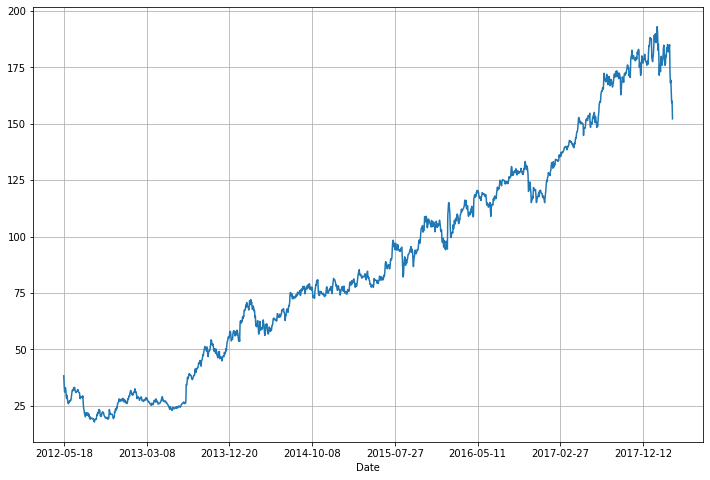

In [8]:
df['Close'].plot(grid=True, figsize=(12, 8))

### World Bank Data

In [9]:
# Does not work, maximum limit of data is reached. See quandl 
# website
data = ql.get_table("WB/DATA", paginate=True)

LimitExceededError: This call exceeds the amount of data that quandl.get_table() allows.         Please use the following link in your browser, which will download the full results as         a CSV file: https://www.quandl.com/api/v3/datatables/WB/DATA?qopts.export=true&api_key=mReXiguoQheAobrp8Dmn . See         our API documentation for more info:         https://docs.quandl.com/docs/in-depth-usage-1#section-download-an-entire-table

In [53]:
df_wb_data = pd.read_parquet('../../data/worldbank/WB_DATA.parquet')

In [20]:
df_wb_pak_data = df_wb_data[df_wb_data['country_name'] == 'Pakistan'].copy(deep=True)

In [56]:
df_wb_meta_data = ql.get_table("WB/METADATA", paginate=True)
#df_wb_meta_data = pd.read_parquet('../../data/worldbank/WB_META_DATA.parquet')

In [45]:
df = (df_wb_pak_data.merge(df_wb_meta_data, on=['series_id'], how='left')
      .drop(['country_name',], axis=1)
      .sort_values(by=['name', 'year'])
      .reset_index()
      [['series_id', 'name', 'year', 'value', 'description', 'country_code']]
     )

<AxesSubplot:xlabel='year'>

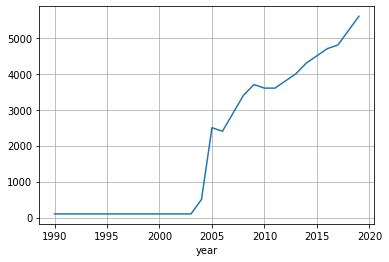

In [52]:
df[df['series_id'] == 'SH.HIV.INCD.YG'].set_index('year')['value'].plot(grid=True)

In [46]:
df['name']

0        ARI treatment (% of children under 5 taken to ...
1        ARI treatment (% of children under 5 taken to ...
2        ARI treatment (% of children under 5 taken to ...
3        ARI treatment (% of children under 5 taken to ...
4        Access to clean fuels and technologies for coo...
                               ...                        
39258    Young people (ages 15-24) newly infected with HIV
39259    Young people (ages 15-24) newly infected with HIV
39260    Young people (ages 15-24) newly infected with HIV
39261    Young people (ages 15-24) newly infected with HIV
39262    Young people (ages 15-24) newly infected with HIV
Name: name, Length: 39263, dtype: object